In [1]:
import timesynth as ts
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [136]:
ts.noise.RedNoise(std=0.35)

TypeError: 'RedNoise' object is not callable

In [128]:
def generate_data(stop_time = 1, num_points = 50, keep_percentage = 50, irregular = True, **kwargs):
    time_sampler = ts.TimeSampler(stop_time = stop_time)
    if irregular:
        time_samples = time_sampler.sample_irregular_time(num_points = num_points, keep_percentage = keep_percentage)
    else:
        time_samples = time_sampler.sample_regular_time(num_points = num_points, keep_percentage = keep_percentage)
    sinusoid = ts.signals.Sinusoidal(frequency=5) # number of sinusoids
    white_noise = ts.noise.GaussianNoise(std=0.35)
    timeseries = ts.TimeSeries(sinusoid, noise_generator = white_noise)
    samples, signals, errors = timeseries.sample(time_samples)
    return time_samples, samples

time_samples, samples = generate_data()

(array([0.0093859 , 0.03512209, 0.08186952, 0.0989679 , 0.23351804,
        0.26879139, 0.27383606, 0.30597594, 0.36983738, 0.37389332,
        0.3897304 , 0.41188357, 0.46338379, 0.46764249, 0.50479843,
        0.51309525, 0.58287651, 0.61352094, 0.62725816, 0.6860568 ,
        0.68833731, 0.77116357, 0.80852589, 0.97104856, 1.04290736]),
 array([ 0.20430361,  1.15364941,  0.8053554 , -0.51615104,  0.84539668,
         0.4075101 ,  1.16220073, -0.25773985, -0.85507522, -0.66910748,
        -0.49928718,  0.36147185,  0.82573075,  1.48799087, -0.00596054,
        -0.61808319, -0.55596415,  0.70246653,  0.5414094 ,  0.60755688,
         0.32915191, -0.95771702, -0.05466263, -1.15450119,  0.80879026]))

(30,)
(30,)


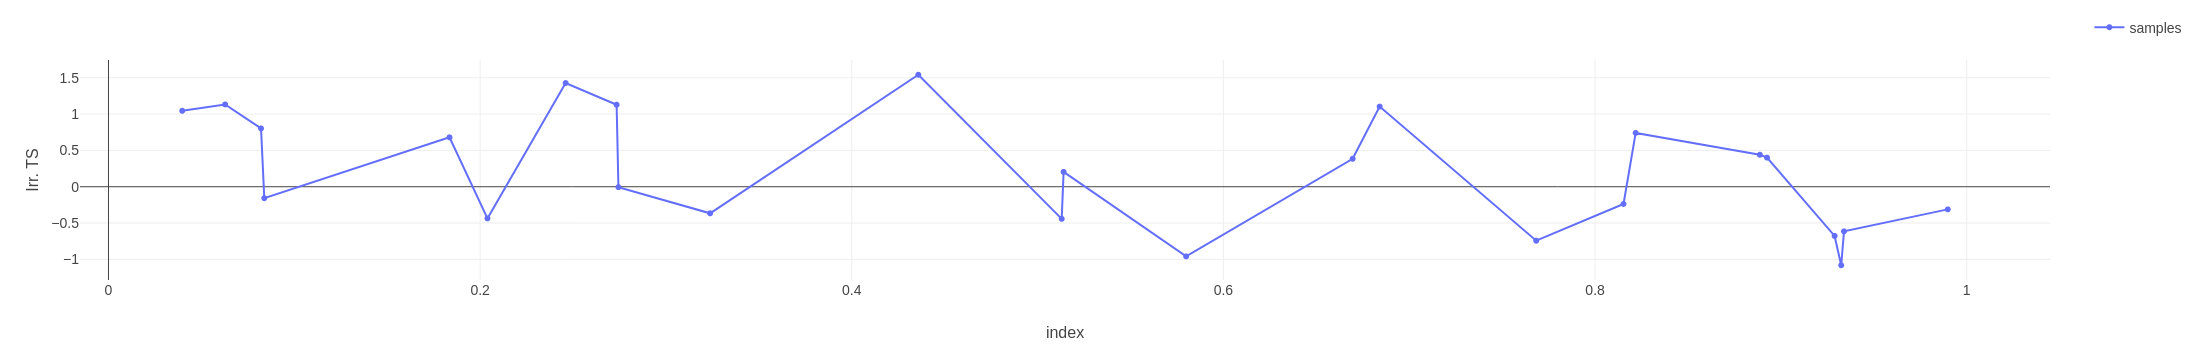

(25,)
(25,)


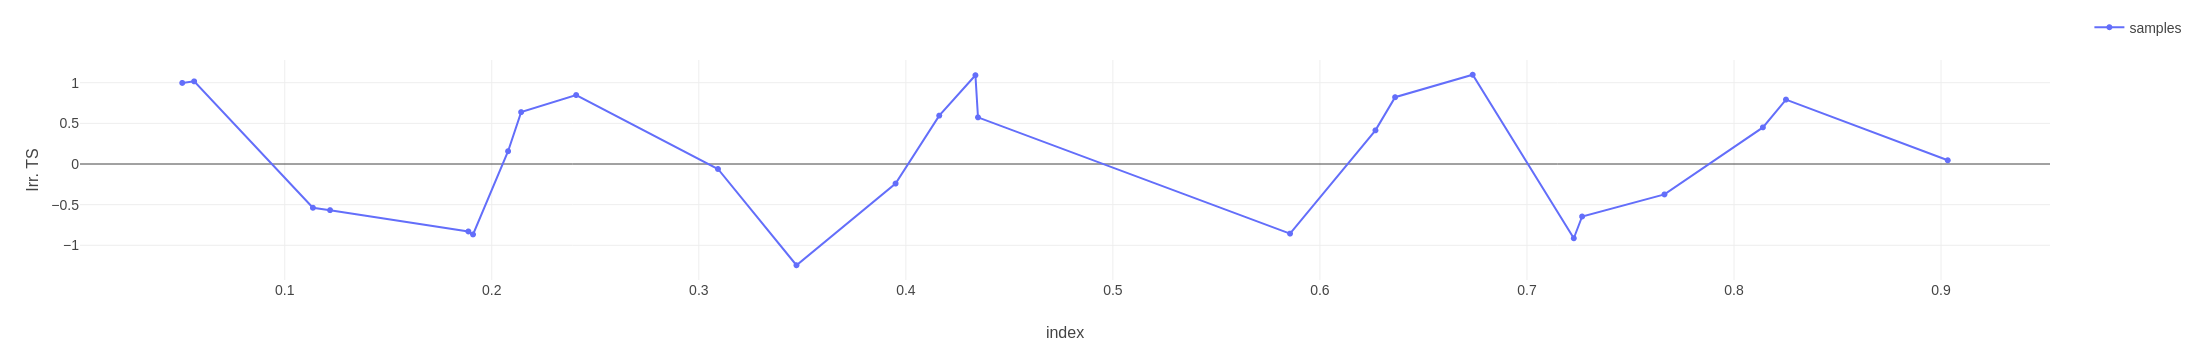

(25,)
(25,)


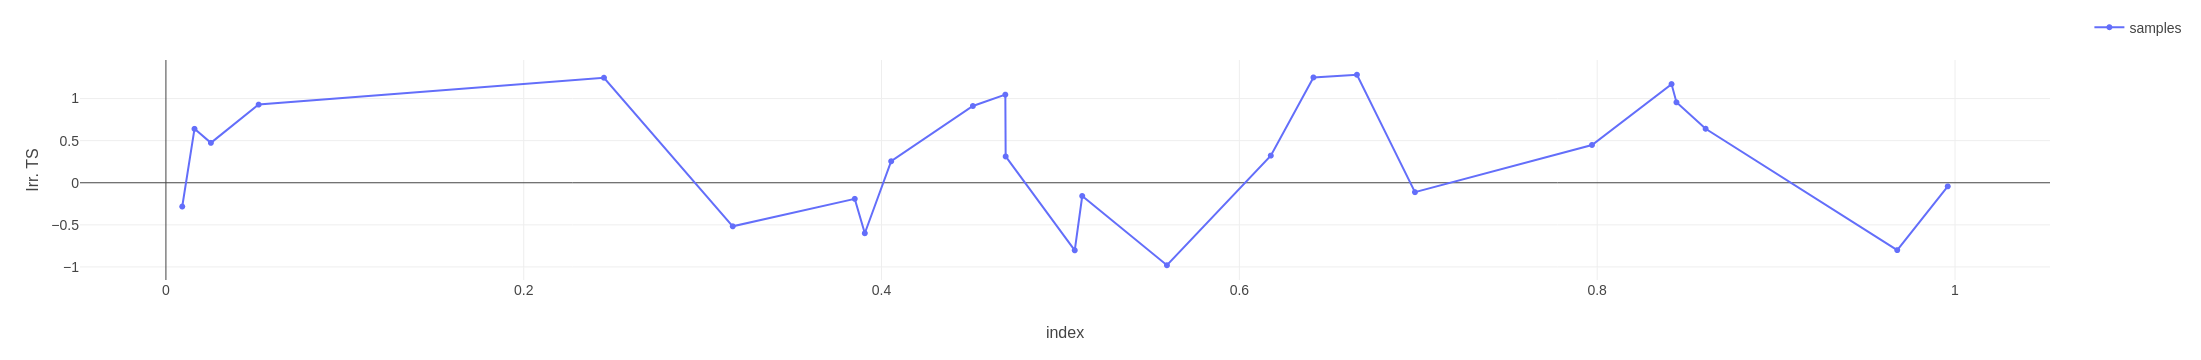

In [122]:
def generate_data_gaussian():
    time_sampler = ts.TimeSampler(stop_time=1)
    irregular_time_samples = time_sampler.sample_irregular_time(num_points=50, keep_percentage=50)
    sinusoid = ts.signals.Sinusoidal(frequency=5) # number of sinusoids
    white_noise = ts.noise.GaussianNoise(std=0.35)
    timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)
    samples, signals, errors = timeseries.sample(irregular_time_samples)
    return irregular_time_samples, samples

def plot_data(time_samples, samples):
    # Plotting the series
    plt.plot(time_samples, samples, marker='o', markersize=4)
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
    plt.title('Irregularly sampled sinusoid with noise');
    
def plot_data2(time_samples, samples, title = ""):
    import plotly.express as px
    import plotly.graph_objects as go
    import plotly.io as pio
    import pandas as pd
    df = pd.DataFrame()
    df.index = time_samples
    df["samples"] = samples

    pio.templates.default = "plotly_white"

    plot_template = dict(
        layout=go.Layout({
            "font_size": 14,
            "xaxis_title_font_size": 16,
            "yaxis_title_font_size": 16})
    )
    fig = px.line(df, labels=dict(created_at="Date", value="Irr. TS"), markers=True)
    #fig.add_vline(x=test_start, line_width=4, line_dash="dash")
    fig.update_layout(
        template=plot_template, legend=dict(orientation='v', y=1.22, title_text=title)
    )
    fig.show()

for i in range(3):
    print(irregular_time_samples.shape)
    print(samples.shape)
    irregular_time_samples, samples = generate_data_gaussian()
    plot_data2(irregular_time_samples, samples)

In [76]:
def createSample(NumTimeSteps, NumFeatures, ImpTimeSteps, ImpFeatures, 
                 Target,start_ImpTS,end_ImpTS,start_ImpFeat,end_ImpFeat,
                 Frequency = None, # Harmonic, PseudoPeriodic
                 Kernel = "Matern",    # GaussianProcess
                 ar_param = None,  # AutoRegressive, CAR
                 Order = None,     # NARMA
                 Sampler = "irregular", DataGenerationProcess = "GaussianProcess", hasNoise = True
                    ):
    if(DataGenerationProcess==None):
        sample=np.random.normal(0,1,[NumTimeSteps,NumFeatures])
        Features=np.random.normal(Target,1,[ImpTimeSteps,ImpFeatures])
        print(Features.shape)
        print(sample.shape)
        sample[start_ImpTS:end_ImpTS,start_ImpFeat:end_ImpFeat]=Features
        # print(start_ImpFeat,end_ImpFeat)

    else:
        time_sampler = ts.TimeSampler(stop_time=20)
        sample=np.zeros([NumTimeSteps,NumFeatures])


        if(Sampler=="regular"):
            time = time_sampler.sample_regular_time(num_points=NumTimeSteps*2, keep_percentage=50)
        else:
            time = time_sampler.sample_irregular_time(num_points=NumTimeSteps*2, keep_percentage=50)

        
        for  i in range(NumFeatures):
            if(DataGenerationProcess== "Harmonic"):
                 signal = ts.signals.Sinusoidal(frequency=Frequency)
                
            elif(DataGenerationProcess=="GaussianProcess"):
                signal = ts.signals.GaussianProcess(kernel=Kernel, nu=3./2)

            elif(DataGenerationProcess=="PseudoPeriodic"):
                signal = ts.signals.PseudoPeriodic(frequency=Frequency, freqSD=0.01, ampSD=0.5)

            elif(DataGenerationProcess=="AutoRegressive"):
                signal = ts.signals.AutoRegressive(ar_param=[ar_param])

            elif(DataGenerationProcess=="CAR"):
                signal = ts.signals.CAR(ar_param=ar_param, sigma=0.01)

            elif(DataGenerationProcess=="NARMA"):
                signal = ts.signals.NARMA(order=Order)

            if(hasNoise):
                noise= ts.noise.GaussianNoise(std=0.3)
                timeseries = ts.TimeSeries(signal, noise_generator=noise)
            else:
                timeseries = ts.TimeSeries(signal)

            feature, signals, errors = timeseries.sample(time)
            sample[:,i]= feature

        #print(sample.squeeze(-1))
        #print(start_ImpTS,end_ImpTS,start_ImpFeat,end_ImpFeat)
        sample_tmp = sample
        sample[start_ImpTS:end_ImpTS,start_ImpFeat:end_ImpFeat]=sample[start_ImpTS:end_ImpTS,start_ImpFeat:end_ImpFeat]+Target
        #print("####")
        #print(sample.squeeze(-1))
        #print(sample - sample_tmp)
        #print(sample[start_ImpTS:end_ImpTS,0])
        print("----------------------------")
    return time, sample


In [98]:
import numpy as np 
NumberOFsamples = 10
NumTimeSteps = 100
NumFeatures = 1

ImpTimeSteps = 30 #[30,14,30,15,6,6, 40,40,20,20]
ImpFeatures = 30 #[30,14,30,15,40,40,6,6,20,20]
    
if NumFeatures == 1:
    StartImpFeatures = 0
else: # whatever value
    StartImpFeatures = 10 #[10,18,10,18,5,5,22,22,None,None ]

StartImpTimeSteps = 10 #[10,18,10,18,22,22,5,5,None,None ]

DataSet = np.zeros((NumberOFsamples ,NumTimeSteps , NumFeatures))
Targets = np.random.randint(-1, 1,NumberOFsamples)
TargetTS_Ends=np.zeros((NumberOFsamples,))
TargetFeat_Ends=np.zeros((NumberOFsamples,))

TargetTS_Starts=np.zeros((NumberOFsamples,))
TargetFeat_Starts=np.zeros((NumberOFsamples,))

TargetTS_Starts[:]= StartImpTimeSteps 
TargetFeat_Starts[:]= StartImpFeatures

In [99]:
Targets

array([ 0,  0,  0, -1, -1, -1,  0, -1, -1,  0])

10.0 0.0 30 30
40.0 30.0
----------------------------


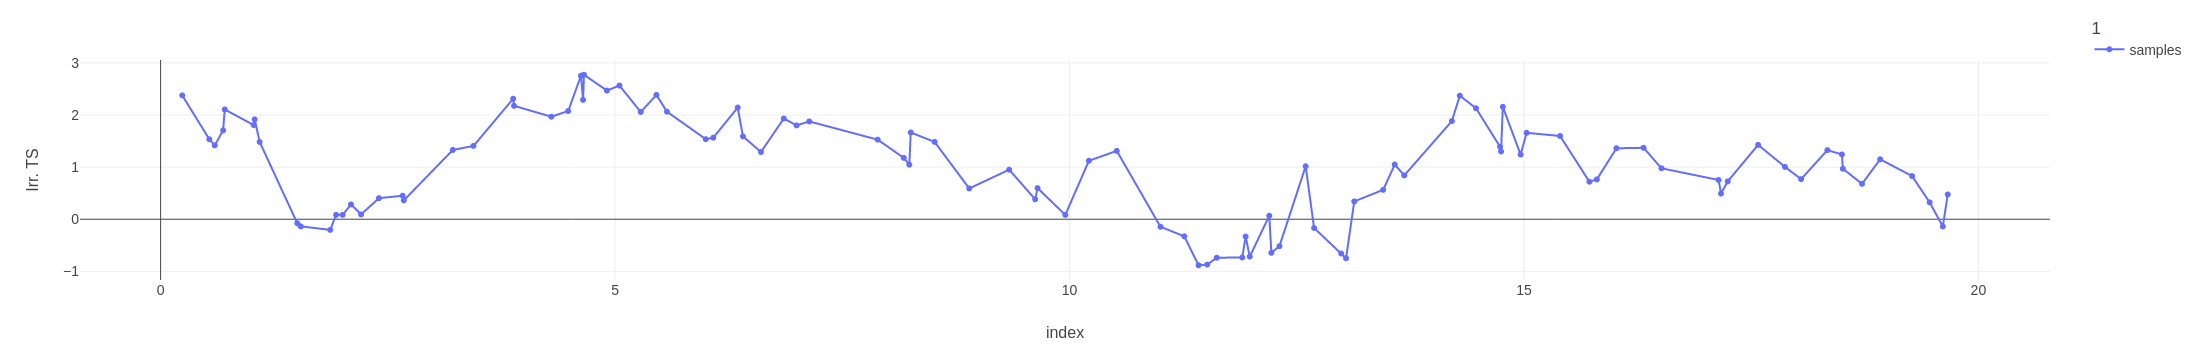

10.0 0.0 30 30
40.0 30.0
----------------------------


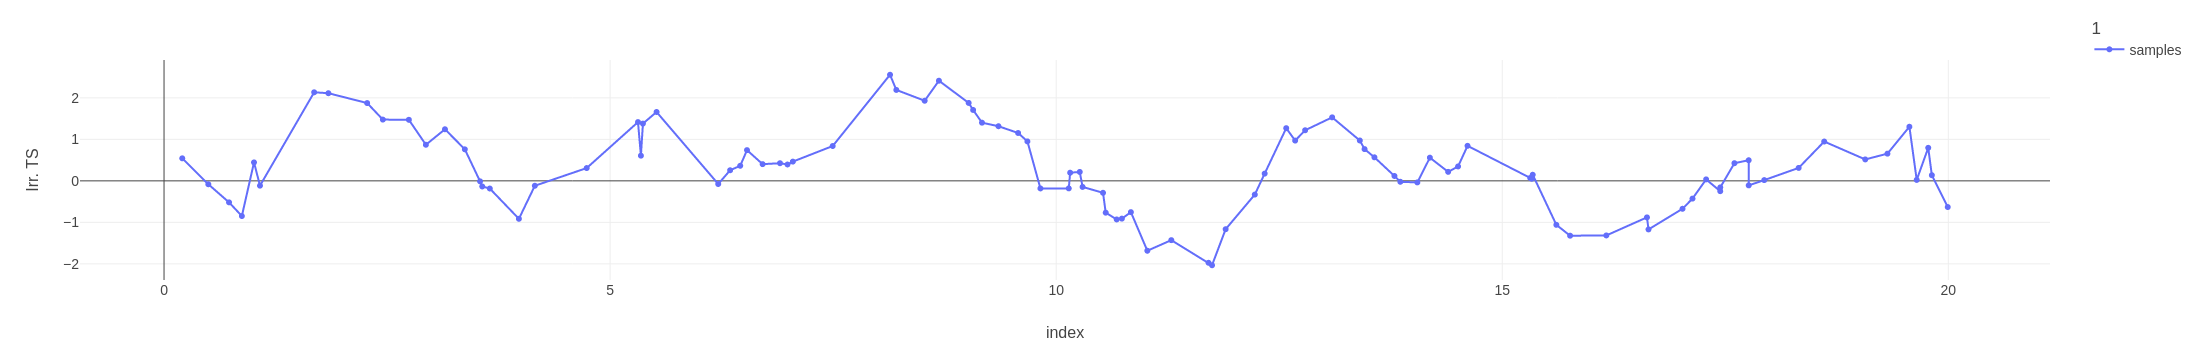

10.0 0.0 30 30
40.0 30.0
----------------------------


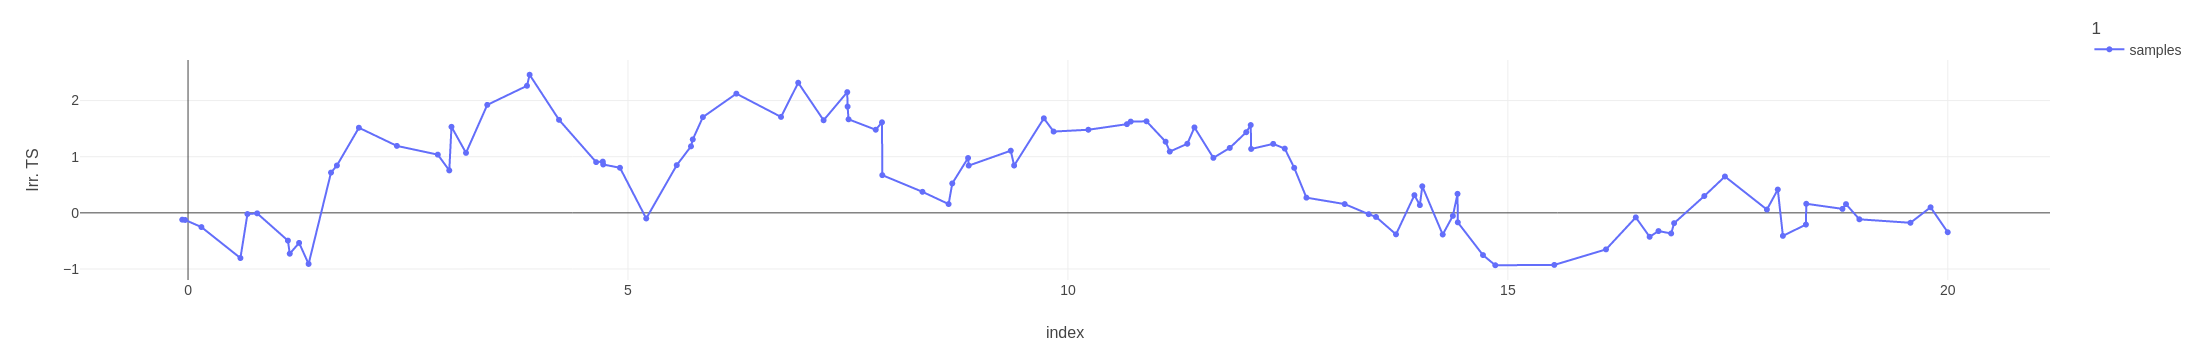

10.0 0.0 30 30
40.0 30.0
----------------------------


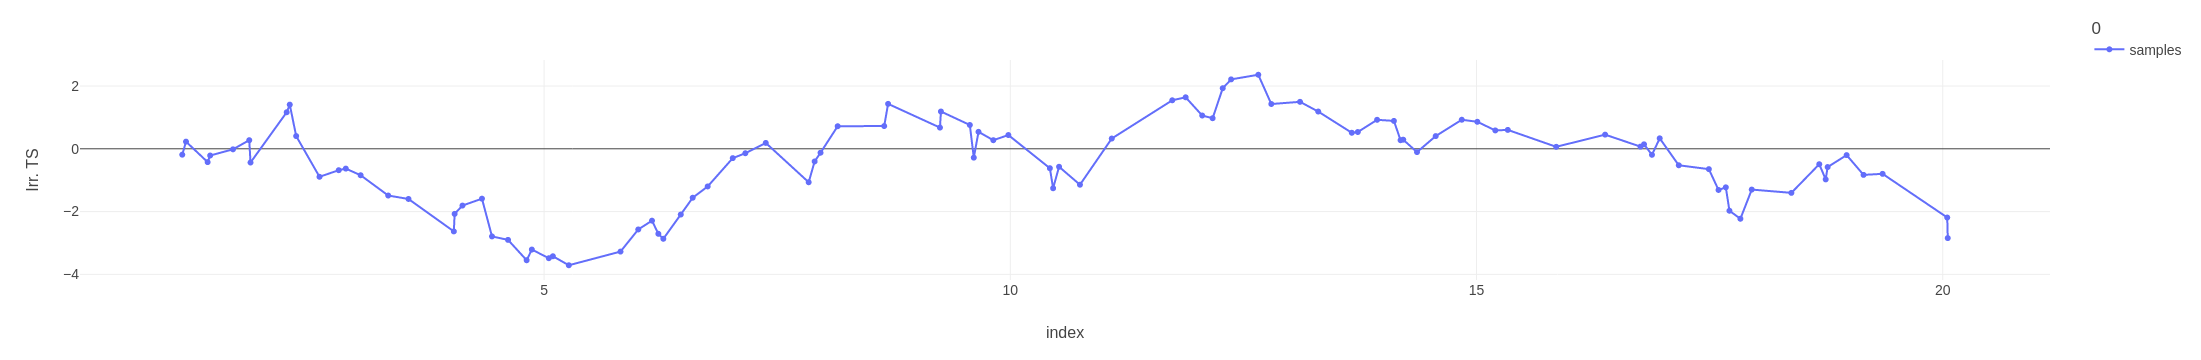

10.0 0.0 30 30
40.0 30.0
----------------------------


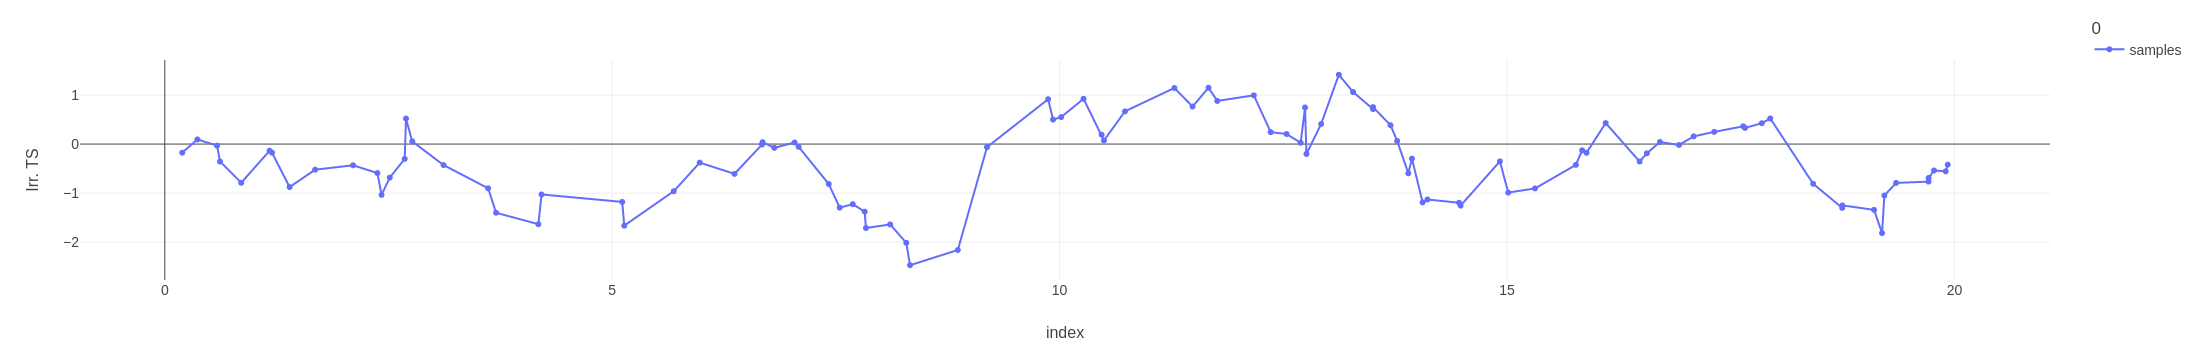

10.0 0.0 30 30
40.0 30.0
----------------------------


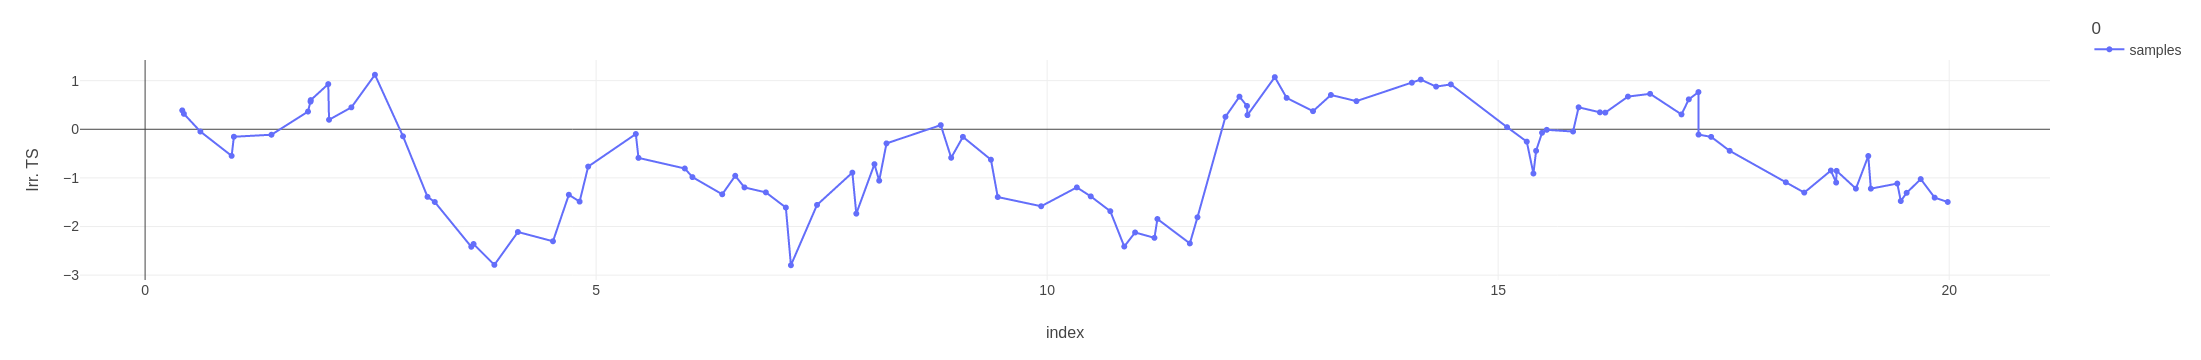

10.0 0.0 30 30
40.0 30.0
----------------------------


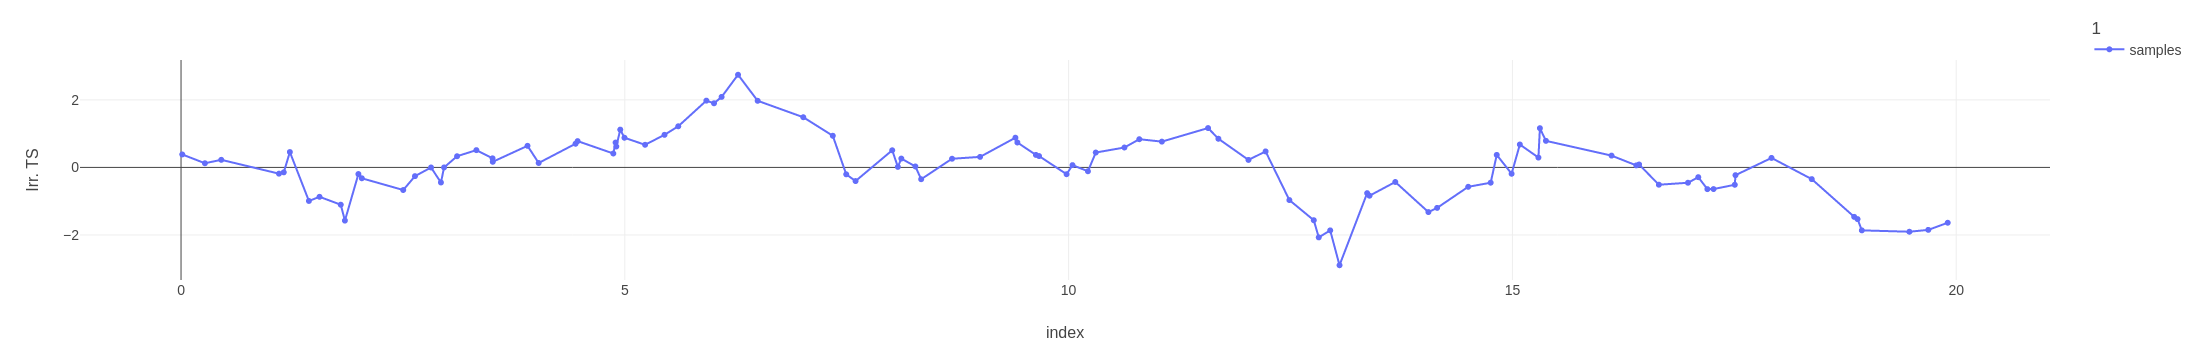

10.0 0.0 30 30
40.0 30.0
----------------------------


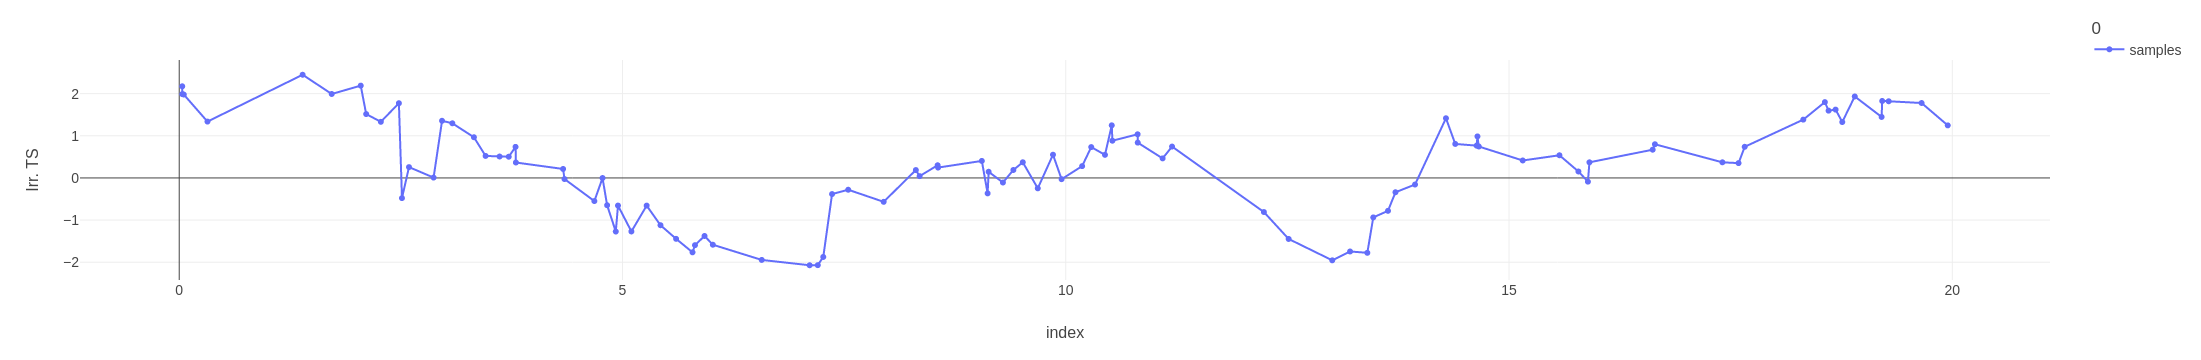

10.0 0.0 30 30
40.0 30.0
----------------------------


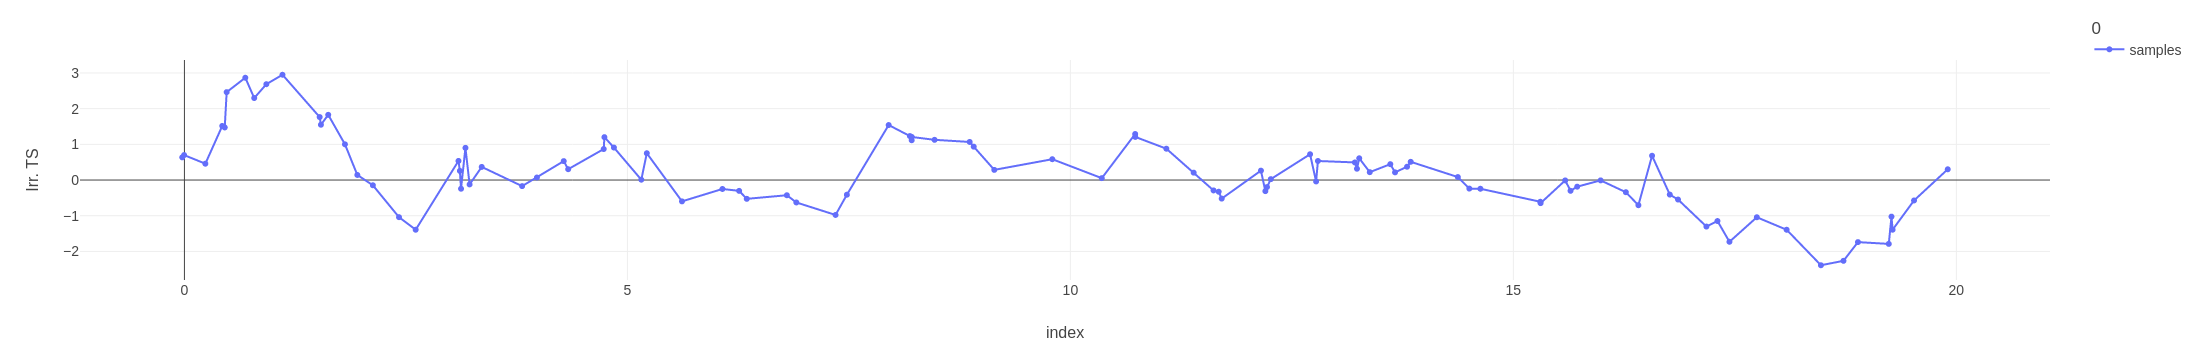

10.0 0.0 30 30
40.0 30.0
----------------------------


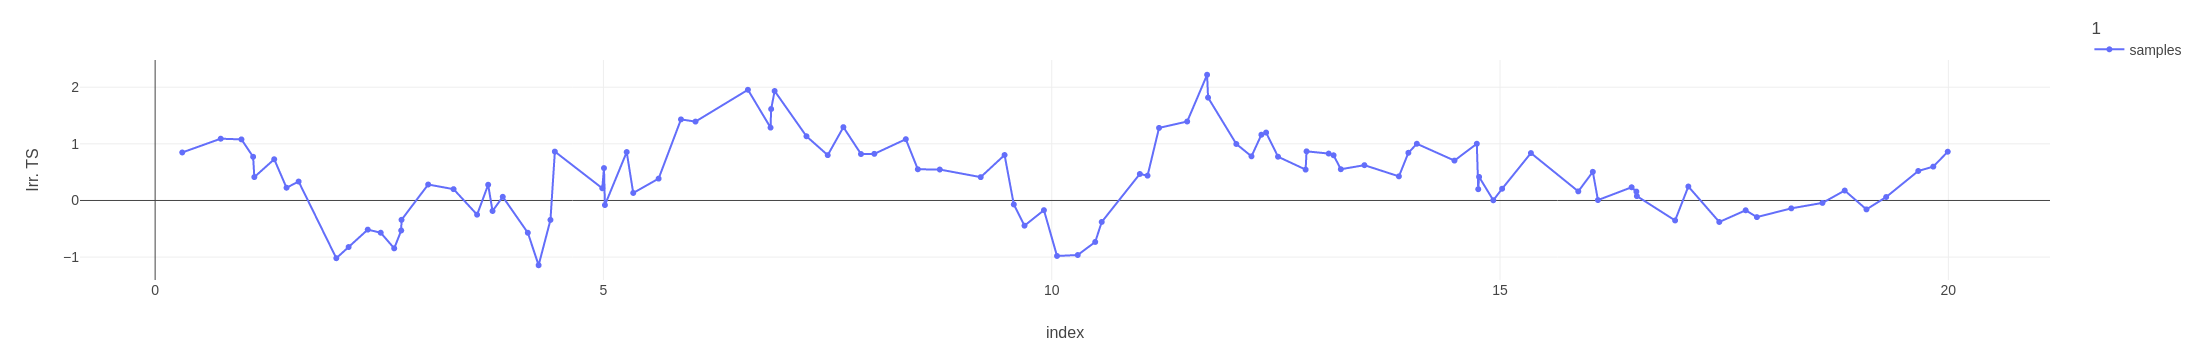

In [100]:
for i in range (NumberOFsamples):
    if(Targets[i]==0):
        Targets[i]=1

    print(TargetTS_Starts[i], TargetFeat_Starts[i], ImpTimeSteps, ImpFeatures)
    TargetTS_Ends[i],TargetFeat_Ends[i] = TargetTS_Starts[i]+ImpTimeSteps, TargetFeat_Starts[i]+ImpFeatures
    print(TargetTS_Ends[i],TargetFeat_Ends[i])
    #print(ImpFeatures)
    [time, sample] = createSample(NumTimeSteps, NumFeatures, ImpTimeSteps, ImpFeatures,
                          Target = Targets[i],
                          start_ImpTS = int(TargetTS_Starts[i]), 
                          end_ImpTS = int(TargetTS_Ends[i]),
                          start_ImpFeat = int(TargetFeat_Starts[i]),
                          end_ImpFeat = int(TargetFeat_Ends[i]))

    if(Targets[i]==-1):
        Targets[i]=0

    DataSet[i,:,:,] = sample
    
    plot_data2(time, sample, title = str(Targets[i]))

In [5]:
DataSet.squeeze(-1)[0].shape

(50,)

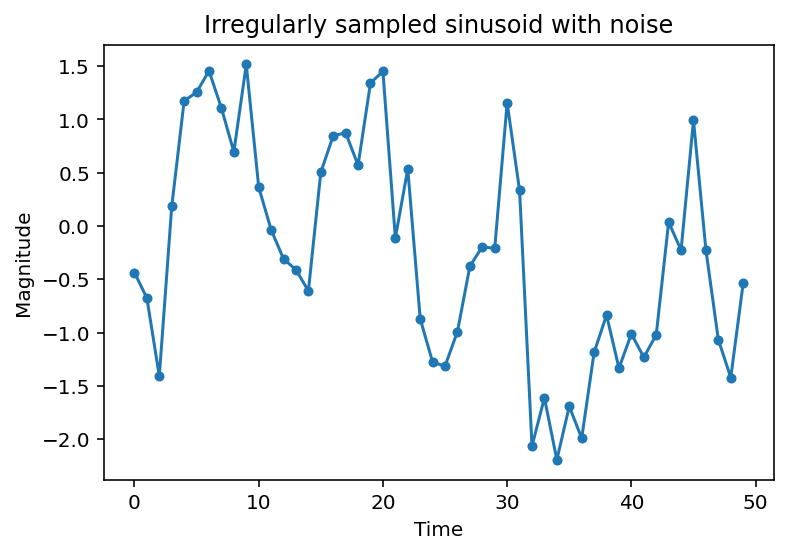

In [6]:
# Plotting the series
plt.plot(DataSet.squeeze(-1)[2], marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with noise');

3
8
10
12
18
19
23
25
29
37
38
40
41
42
44
45
47
50
53
63
64
66
67
69
71
73
75
80
82
85
88
90
92
94
97


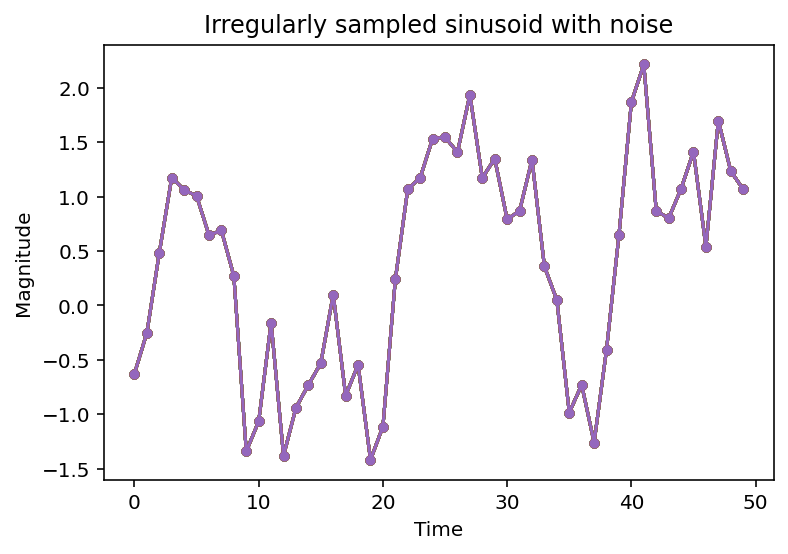

In [189]:
for i in np.where(Targets == 1)[0]:
    print(i)
    plt.plot(DataSet.squeeze(-1)[2], marker='o', markersize=4)
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
    plt.title('Irregularly sampled sinusoid with noise');